In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("airlines_reviews.csv")


## Manipulación de datos

In [4]:
df = df[df['Verified'].isin(['True', 'False'])]

Cantidad comentario verificado

In [5]:
print(df.Verified.value_counts())
print()
frecuencia_true = (df["Verified"] == 'True').sum()
print(f'La cantidad de comentarios verificados son {frecuencia_true}')



Verified
True     6216
False    1881
Name: count, dtype: int64

La cantidad de comentarios verificados son 6216


¿Cuál es el rango de fechas de los vuelos que se registran en el dataset? 

In [6]:
df['Review Date']=pd.to_datetime(df['Review Date'])

In [7]:
fecha_max=df['Review Date'].max()
fecha_min=df['Review Date'].min()

print(f'Fecha mas reciente {fecha_max}')
print(f'Fecha mas lejana {fecha_min}')

Fecha mas reciente 2024-03-06 00:00:00
Fecha mas lejana 2016-03-22 00:00:00


¿Cuál es el promedio de comentarios de cada aerolínea por año?

In [8]:
df["Review Date"] = pd.to_datetime(df["Review Date"])
df["Year"] = df["Review Date"].dt.year

In [9]:
comentarios_por_año = df.groupby(["Airline", "Year"]).size().reset_index(name="Total Comentarios")

In [10]:
comentarios_por_año

,Airline,Year,Total Comentarios
0,Air France,2016,63
1,Air France,2017,135
2,Air France,2018,142
3,Air France,2019,128
4,Air France,2020,49
...,...,...,...
84,Turkish Airlines,2020,150
85,Turkish Airlines,2021,192
86,Turkish Airlines,2022,230
87,Turkish Airlines,2023,219


In [11]:
comentarios_pivot = comentarios_por_año.pivot_table(index="Airline", columns="Year", values="Total Comentarios", fill_value=0)
comentarios_pivot

Year,2016,2017,2018,2019,2020,2021,2022,2023,2024
Airline,,,,,,,,,
Air France,63.0,135.0,142.0,128.0,49.0,42.0,113.0,118.0,8.0
All Nippon Airways,28.0,62.0,40.0,50.0,12.0,3.0,17.0,39.0,7.0
Cathay Pacific Airways,98.0,170.0,169.0,166.0,43.0,2.0,15.0,74.0,7.0
EVA Air,28.0,66.0,62.0,48.0,22.0,5.0,18.0,32.0,0.0
Emirates,169.0,264.0,259.0,244.0,103.0,50.0,125.0,117.0,17.0
Japan Airlines,32.0,28.0,29.0,34.0,13.0,11.0,23.0,28.0,3.0
Korean Air,22.0,45.0,39.0,35.0,10.0,2.0,9.0,22.0,3.0
Qatar Airways,141.0,264.0,213.0,239.0,141.0,123.0,258.0,214.0,30.0
Singapore Airlines,106.0,164.0,153.0,210.0,69.0,14.0,108.0,124.0,24.0


## Visualizaciones

Un gráfico de barras que muestre la distribución de los vuelos a lo largo de los meses. Esto con el fin de poder identificar en cuales meses se viajan más o menos.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df["Month"] = df["Review Date"].dt.month

In [14]:
vuelos_por_mes = df["Month"].value_counts().sort_index()


([<matplotlib.axis.XTick at 0x1bee7c339d0>,
 [Text(1, 0, 'Ene'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Abr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Ago'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dic')])

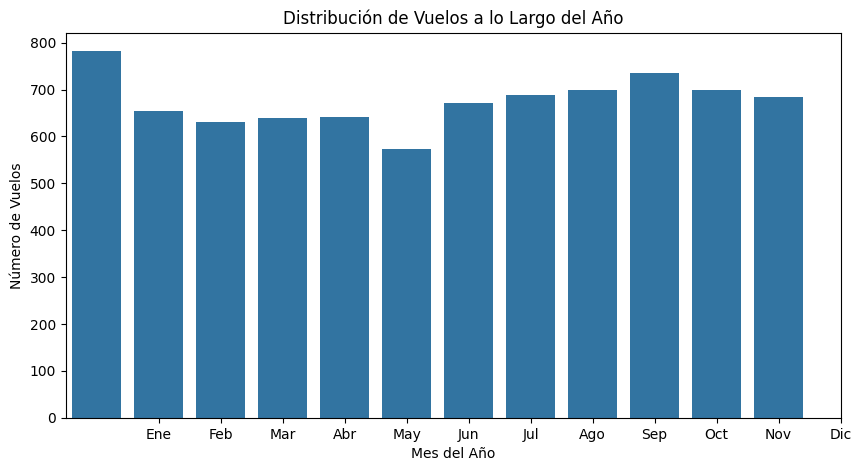

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=vuelos_por_mes.index, y=vuelos_por_mes.values)

plt.xlabel("Mes del Año")
plt.ylabel("Número de Vuelos")
plt.title("Distribución de Vuelos a lo Largo del Año")
plt.xticks(ticks=range(1, 13), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

Un histograma que muestre “Overall Rating” de las dos aerolíneas con mayor 
cantidad de comentarios. Se debe diferenciar por color estas dos compañías. 
Gracias a esto se de pronto se puede identificar si alguna de estas dos empresas 
tiene una mejor calificación respecto a la otra.  

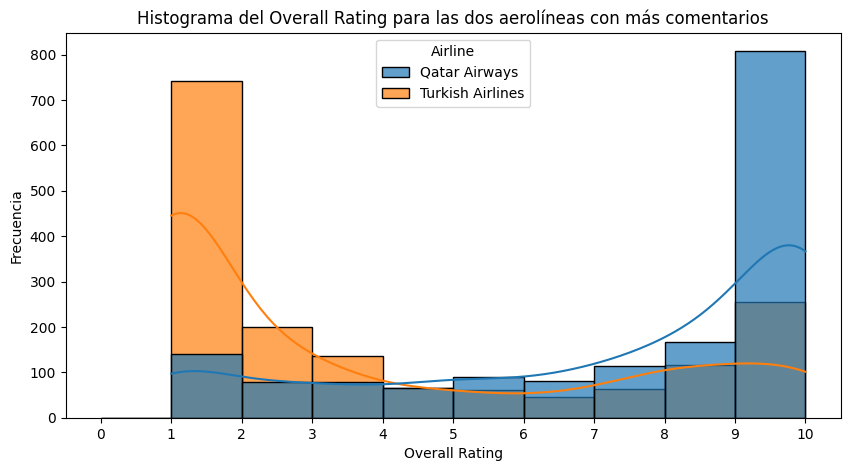

In [17]:
import numpy as np

top_2_aerolineas = df["Airline"].value_counts().nlargest(2).index

df_top_2 = df[df["Airline"].isin(top_2_aerolineas)]

plt.figure(figsize=(10, 5))
sns.histplot(data=df_top_2, x="Overall Rating", hue="Airline", bins=np.arange(0, 11, 1), kde=True, alpha=0.7)

plt.xlabel("Overall Rating")
plt.ylabel("Frecuencia")
plt.title("Histograma del Overall Rating para las dos aerolíneas con más comentarios")
plt.xticks(range(0, 11))

plt.show()


Un gráfico tipo torta/pastel que muestre el porcentaje de comentarios de 
“Economy Class”, “Business Class” y “Others”, es decir, solo se deben poder 
observar en el gráfico 3 categorías. 

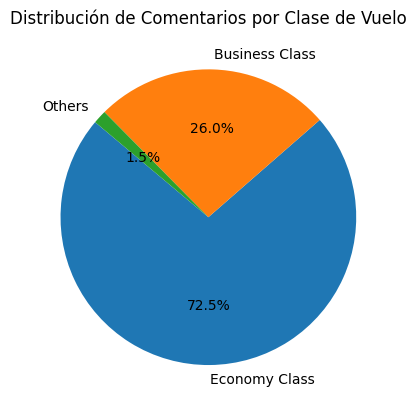

In [24]:
df["Class"] = df["Class"].astype(str).str.strip().str.lower()  # Asegurar que es string, eliminar espacios y convertir a minúsculas

df["Class Category"] = df["Class"].apply(lambda x: 
    "Economy Class" if "economy" in x else 
    "Business Class" if "business" in x else "Others"
)

suma_categoria = df["Class Category"].value_counts()

plt.pie(suma_categoria, labels=suma_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Comentarios por Clase de Vuelo")

# Mostrar el gráfico
plt.show()


Un gráfico de dispersión que compare “Seat Comfort” y “Value for Money”. 

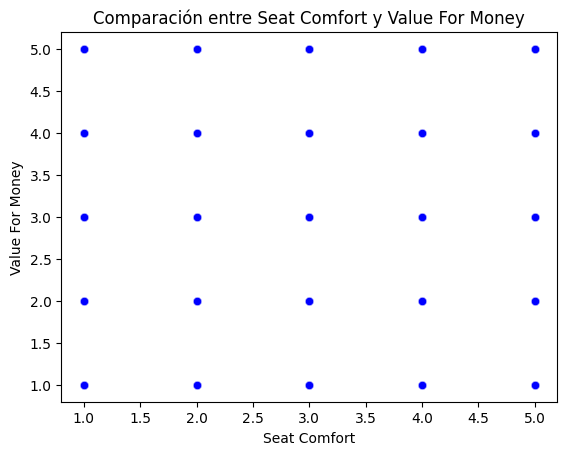

In [ ]:
sns.scatterplot(data=df, x="Seat Comfort", y="Value For Money", alpha=0.5, color="blue")
plt.xlabel("Seat Comfort")
plt.ylabel("Value For Money")
plt.title("Comparación entre Seat Comfort y Value For Money")
plt.show()


Analisis de Santimientos

In [ ]:
def filtro_aerolinea(df, nombre_aeroliniea):
    return df[df['Airline'].str.lower() == nombre_aeroliniea.lower()]

def cuenta_palabras(textos):
    conteo_palabras = {}
    for texto in textos: 
        palabras = texto.lower().split()
        for palabra in palabras:
            if palabra:
                conteo_palabras[palabra] = conteo_palabras.get(palabra, 0) + 1
    return conteo_palabras


def analisar_sentimientos(conteo_palabras, palabras_positivas, palabras_negativas):
    cuenta_positivos = sum(conteo_palabras.get(palabra, 0) for palabra in palabras_positivas)
    cuenta_negativos = sum(conteo_palabras.get(palabra, 0) for palabra in palabras_negativas)
    return {'positivas': cuenta_positivos, 'negativas': cuenta_negativos}

palabras_positivas = {"great", "awesome", "wonderful", "fantastic", "amazing", "brilliant", "terrific", "outstanding", "fabulous", "superb", "marvelous", "splendid", "exceptional", "remarkable", "phenomenal"}
palabras_negativas = {"terrible", "awful", "horrible", "bad", "disappointing", "poor", "dreadful", "mediocre", "unpleasant", "unacceptable", "inferior", "repulsive", "abysmal", "lousy", "miserable"}

def analisis_sentimientos(df, nombre_aeroliniea):
    df_airline = filtro_aerolinea(df, nombre_aeroliniea)
    
    title_cuenta_palabras = cuenta_palabras(df_airline['Title'])
    title_sentimiento = analisar_sentimientos(title_cuenta_palabras, palabras_positivas, palabras_negativas)
    
    # Análisis en "Reviews"
    review_cuenta_palabras = cuenta_palabras(df_airline['Reviews'])
    review_sentimiento = analisar_sentimientos(review_cuenta_palabras, palabras_positivas, palabras_negativas)
    
    return {'title_sentimiento': title_sentimiento,'review_sentimiento': review_sentimiento}

In [ ]:
aerolineas = [
    "Singapore Airlines",
    "Qatar Airways",
    "All Nippon Airways",
    "Emirates",
    "Japan Airlines",
    "Turkish Airlines",
    "Air France",
    "Cathay Pacific Airways",
    "EVA Air",
    "Korean Air"
]

print("Seleccione una aerolínea:")
for i, aerolinea in enumerate(aerolineas, 1):
    print(f"{i}. {aerolinea}")

opcion = int(input("Ingrese el número de la aerolínea: "))

if 1 <= opcion <= len(aerolineas):
    aerolinea_seleccionada = aerolineas[opcion - 1]
    print(f"Has seleccionado: {aerolinea_seleccionada}")
else:
    print("Opción no válida.")


airline_name = aerolinea_seleccionada
results = analisis_sentimientos(df, airline_name)
print("Sentimiento basado en 'Title':", results['title_sentimiento'])
print("Sentimiento basado en 'Reviews':", results['review_sentimiento'])


Seleccione una aerolínea:
1. Singapore Airlines
2. Qatar Airways
3. All Nippon Airways
4. Emirates
5. Japan Airlines
6. Turkish Airlines
7. Air France
8. Cathay Pacific Airways
9. EVA Air
10. Korean Air
Has seleccionado: Qatar Airways
Sentimiento basado en 'Title': {'positivas': 219, 'negativas': 50}
Sentimiento basado en 'Reviews': {'positivas': 774, 'negativas': 265}
